# London Bike Sharing Data Preprocessing

**Importing Necessary Libraries**

We begin by importing the essential libraries for data manipulation and analysis.

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

We load the dataset from a CSV file to explore its structure and contents.

In [361]:
df = pd.read_csv("london_merged.csv")

In [362]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


**Initial Data Exploration**

To understand the dataset's structure, we will examine its information and the number of unique values in each column.

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [364]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [365]:
df.nunique().reset_index()

,index,0
0,timestamp,17414
1,cnt,3781
2,t1,73
3,t2,82
4,hum,143
5,wind_speed,103
6,weather_code,7
7,is_holiday,2
8,is_weekend,2
9,season,4


**Renaming Columns**

For clarity and consistency, we will rename the columns using a more descriptive naming convention.

In [366]:
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}


df.rename(new_cols_dict, axis=1, inplace=True)

In [367]:
df

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


**Data Transformation**

### Adjusting Humidity Values

The humidity values are currently in percentage form. We will convert them to a decimal format for consistency with other metrics.

In [368]:
df['humidity_percent'] = df['humidity_percent'] / 100

In [369]:
df

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,4.0,0.0,0.0,3.0


### Mapping Categorical Variables

We will map numerical codes to descriptive labels for the 'season' and 'weather' columns to enhance readability.

#### Season Mapping
#### Weather Mapping


In [370]:

season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}


weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}


df['season'] = df['season'].astype('str').map(season_dict)
df['weather'] = df['weather'].astype('str').map(weather_dict)

In [371]:
df

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,winter


In [372]:
df.nunique()

time                 17414
count                 3781
temp_real_C             73
temp_feels_like_C       82
humidity_percent       143
wind_speed_kph         103
weather                  7
is_holiday               2
is_weekend               2
season                   4
dtype: int64

In [373]:
df

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,winter


### Adding Hour Column

We extract the hour from the timestamp to enable analysis of hourly patterns.

In [374]:
df['hour'] = pd.to_datetime(df['time']).dt.hour
df

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,hour
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,3
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,4
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,winter,19
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter,20
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter,21
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,winter,22


**Exploratory Data Analysis**

We'll now perform some exploratory data analysis to understand the relationships between various factors and bike rental counts.

### Weather Impact on Bike Rentals

We analyze how different weather conditions affect the number of bike rentals.

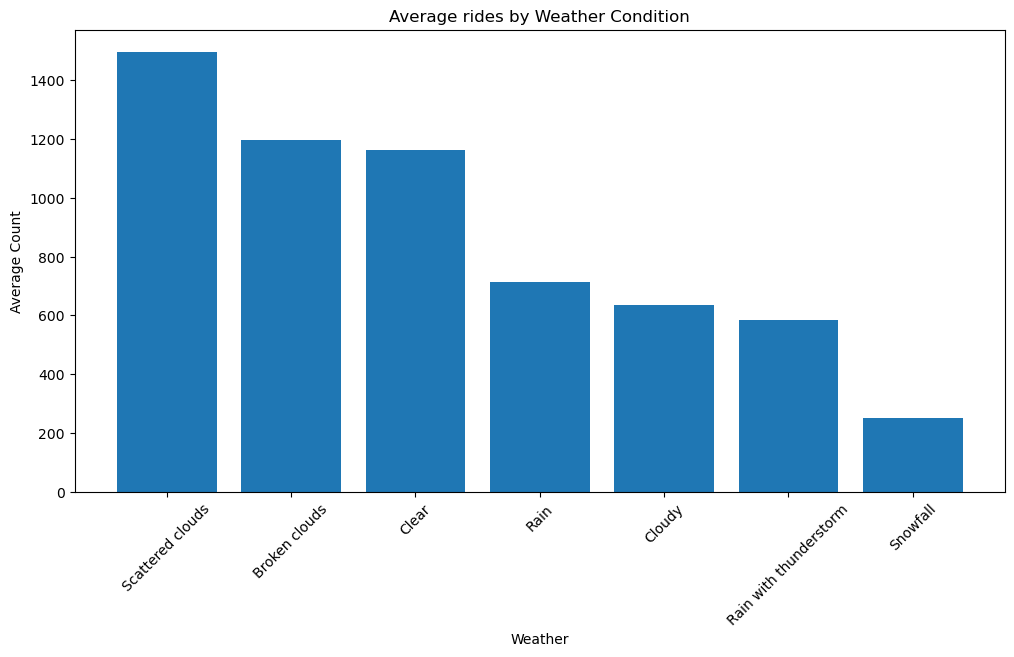

In [375]:
weather_impact = df.groupby('weather')['count'].agg(['mean', 'std']).reset_index()
weather_impact = weather_impact.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(weather_impact['weather'], weather_impact['mean'])
plt.title('Average rides by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.show()


### Seasonal Impact on Bike Rentals

We examine how bike rental patterns change across different seasons.

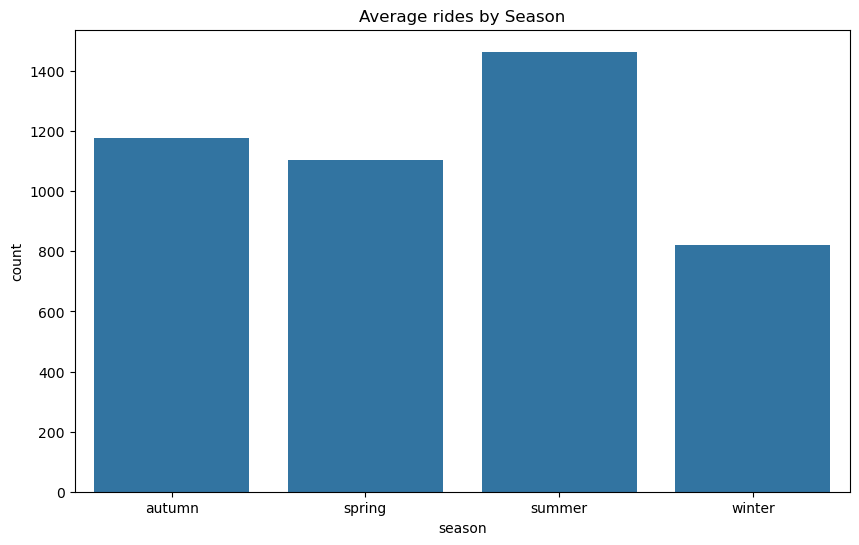

In [376]:
seasonal_impact = df.groupby('season')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=seasonal_impact)
plt.title('Average rides by Season')
plt.show()


### Weekend vs Weekday Impact

We compare the average number of rides on weekends versus weekdays.


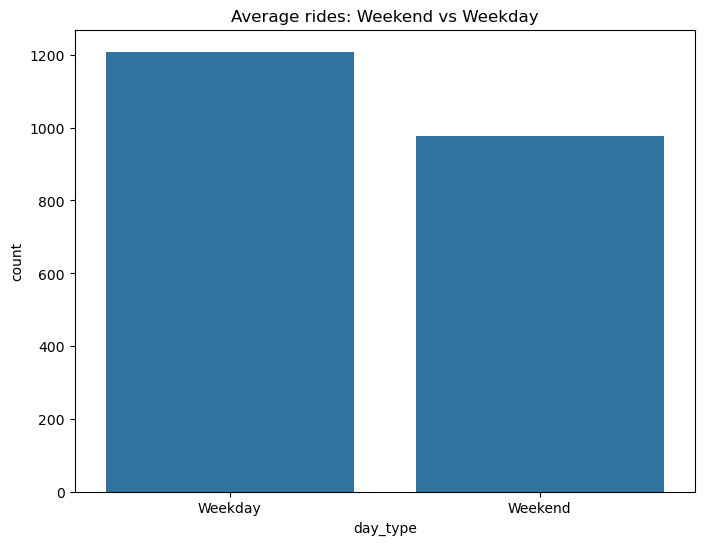

In [377]:
weekend_impact = df.groupby('is_weekend')['count'].mean().reset_index()
weekend_impact['day_type'] = weekend_impact['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(8, 6))
sns.barplot(x='day_type', y='count', data=weekend_impact)
plt.title('Average rides: Weekend vs Weekday')
plt.show()


### Temperature Impact on Bike Rentals

We categorize temperatures and analyze their impact on bike rentals.

C:\Users\ostor\AppData\Local\Temp\ipykernel_19648\2052126059.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_impact = df.groupby('temp_category')['count'].mean().reset_index()


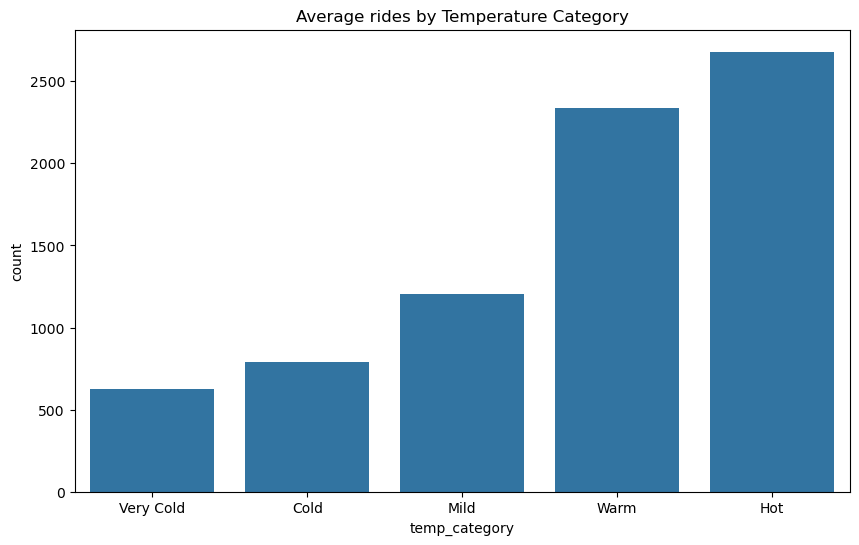

In [378]:

df['temp_category'] = pd.cut(df['temp_real_C'], bins=[-np.inf, 0, 10, 20, 30, np.inf], labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

temp_impact = df.groupby('temp_category')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='temp_category', y='count', data=temp_impact)
plt.title('Average rides by Temperature Category')
plt.show()


### Distribution of Rides by Weather and Season

We use box plots to visualize the distribution of ride counts across different weather conditions and seasons.

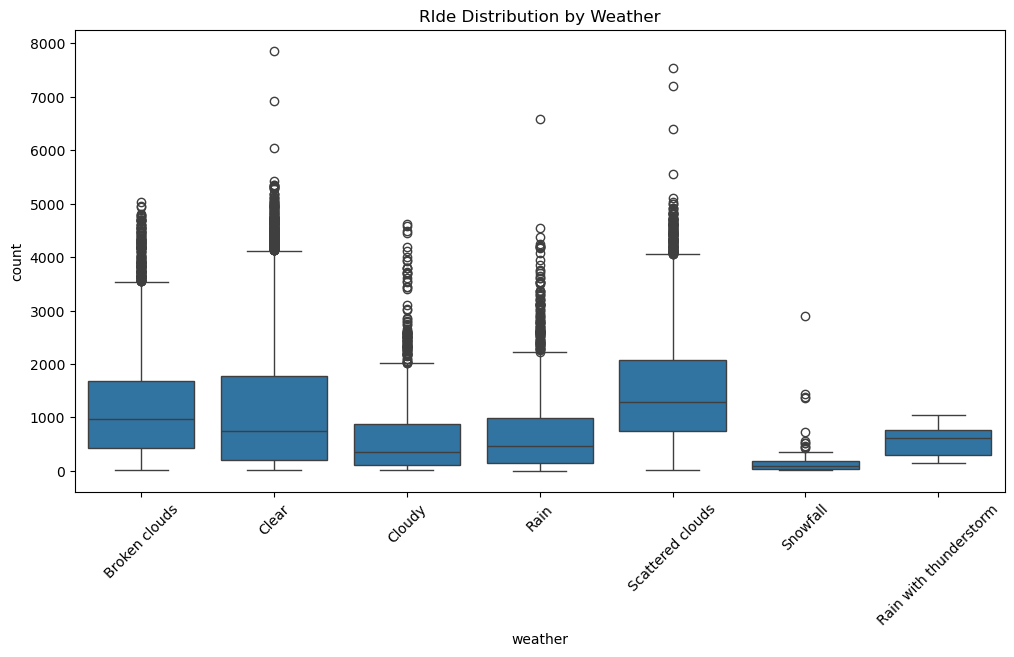

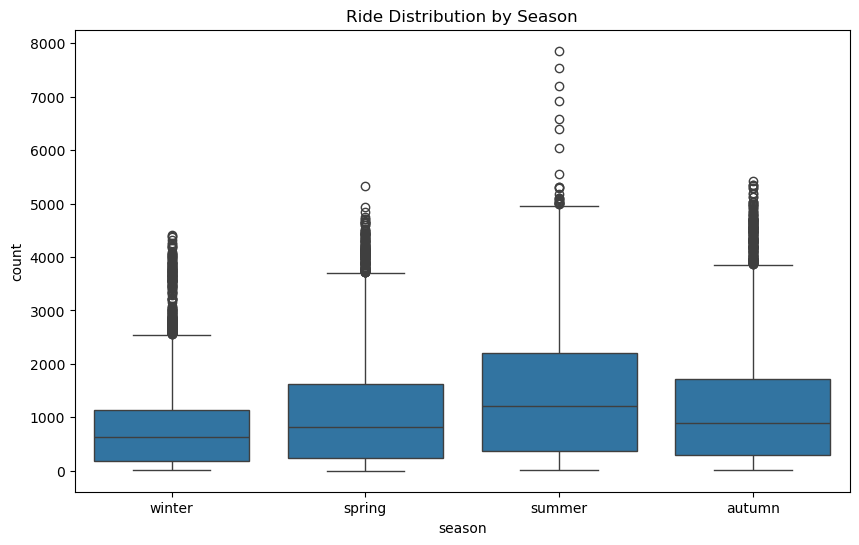

In [379]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='count', data=df)
plt.title('RIde Distribution by Weather')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Ride Distribution by Season')
plt.show()



### Hourly Patterns by Day of Week

We create a heatmap to visualize hourly rental patterns for each day of the week.

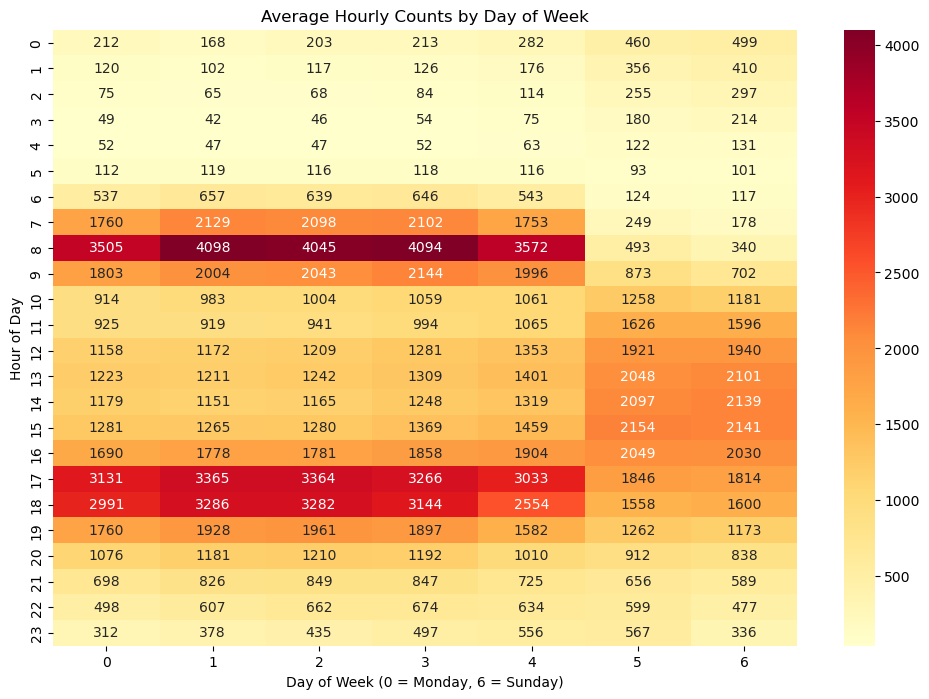

In [380]:
df['day_of_week'] = pd.to_datetime(df['time']).dt.dayofweek


hourly_counts = df.pivot_table(values='count', index='hour', columns='day_of_week', aggfunc='mean')


plt.figure(figsize=(12, 8))
sns.heatmap(hourly_counts, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Hourly Counts by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Hour of Day')
plt.show()